In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
from datetime import datetime as dt
from datetime import timedelta as td

In [3]:
pd.set_option('display.max_columns',None)

In [17]:
#train = pd.read_csv('Hotel-A-train.csv')
#test = pd.read_csv('Hotel-A-test.csv')
validation = pd.read_csv('Hotel-A-validation.csv')

#t = pd.read_csv(r"C:\Users\user\Desktop\MIT\Lanka Tiles\Introduced_date.csv")

In [18]:
validation

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,...,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,...,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,...,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,...,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,...,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,11/18/2016,11/21/2016,...,BB,Yes,No,Refundable,Online,No,Check-In,Yes,10,199
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,12/9/2016,12/10/2016,...,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,11/18/2016,11/20/2016,...,FB,No,No,Refundable,Agent,No,No-Show,Yes,20,136
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,11/18/2016,11/19/2016,...,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,226


In [144]:
t[t.IntroducedDate.isnull()]

,ItemKey,IntroducedDate
0,106249,NaN
1,181675,NaN
2,50747,NaN
5,99347,NaN
6,43845,NaN
...,...,...
142176,97390,NaN
142177,23624,NaN
142178,60492,NaN
142179,89202,NaN


In [51]:
#train2 = train.copy()
#train3 = train2.copy()

In [124]:
validation

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,45716350,M,56,caucasian,Grad,<25K,West,Resort,8/31/2016,9/2/2016,2/18/2016,2,2,0,HB,No,No,No Deposit,Agent,No,No-Show,Yes,15,192
1,88857401,M,60,Latino,College,25K --50K,West,Resort,8/31/2016,9/4/2016,3/9/2016,2,2,0,FB,Yes,No,No Deposit,Online,Yes,Canceled,No,0,187
2,16074440,F,58,Asian American,College,<25K,North,Airport Hotels,9/1/2016,9/2/2016,2/21/2016,3,1,0,FB,No,No,No Deposit,Direct,No,Canceled,Yes,10,227
3,10992124,F,23,Latino,College,25K --50K,East,Airport Hotels,8/31/2016,9/2/2016,5/20/2016,1,2,0,FB,Yes,No,Refundable,Direct,No,Check-In,Yes,25,189
4,15934351,F,47,Asian American,College,25K --50K,South,City Hotel,8/31/2016,9/1/2016,5/31/2016,1,1,0,HB,Yes,No,No Deposit,Online,Yes,Check-In,Yes,10,218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,F,22,caucasian,College,50K -- 100K,South,Resort,11/18/2016,11/21/2016,10/12/2016,5,1,1,BB,Yes,No,Refundable,Online,No,Check-In,Yes,10,199
2745,52215692,F,35,caucasian,College,25K --50K,South,Airport Hotels,12/9/2016,12/10/2016,7/8/2016,3,2,0,FB,No,No,Non-Refundable,Direct,Yes,Canceled,Yes,5,106
2746,31908733,M,18,Asian American,Grad,25K --50K,North,Resort,11/18/2016,11/20/2016,10/19/2016,2,3,0,FB,No,No,Refundable,Agent,No,No-Show,Yes,20,136
2747,41776403,M,42,Asian American,College,<25K,West,City Hotel,11/18/2016,11/19/2016,6/1/2016,5,1,0,HB,Yes,Yes,No Deposit,Online,Yes,Check-In,Yes,20,226


In [112]:
train.describe()

,Reservation-id,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,Reservation_Status
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.00000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,0.501800,1.410888,2.294738,2.333576,1.743882,0.351540,0.332921,0.113459,0.713808,0.751664,12.495182,175.136478,0.253282,0.248664,0.247500,0.250555,0.401906,0.197971,0.200807,0.199316,0.198553,0.206189,0.396996,0.198262,0.336667,0.332158,0.331176,0.517255,0.18888,0.293865,0.663442,0.082585,0.253973,0.144842,0.288811,0.566348,1.836212,1.304884
std,2.886911e+07,0.500006,1.055317,1.028755,1.176526,0.721972,0.573326,0.471267,0.317158,0.451989,0.432056,11.206036,43.877087,0.434899,0.432246,0.431567,0.433340,0.490292,0.398477,0.400611,0.399494,0.398918,0.404575,0.489284,0.398698,0.472578,0.470996,0.470645,0.499711,0.39142,0.455539,0.472541,0.275259,0.435290,0.351947,0.453218,0.495587,0.985204,0.605388
min,3.154000e+03,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,2.523943e+07,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,5.014996e+07,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000,175.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000
75%,7.518288e+07,1.000000,2.000000,3.000000,3.000000,2.000000,1.000000,1.000000,0.000000,1.000000,1.000000,20.000000,214.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,9.999900e+07,1.000000,3.000000,4.000000,5.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,40.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000


In [9]:
target = ['Reservation_Status']
Encode_columns = ['Gender',
                  'Ethnicity',
                  'Educational_Level',
                  'Income',
                  'Country_region',
                  'Hotel_Type',
                  'Meal_Type',
                  'Visted_Previously',
                  'Previous_Cancellations',
                  'Deposit_type',
                  'Booking_channel',
                  'Required_Car_Parking',
                  'Use_Promotion']
                  
                  


In [10]:
# checking the cardinality
True_cardinality=[cols for cols in Encode_columns if set(train[cols])==set(test[cols])]
len(True_cardinality)

13

In [31]:
# < Label Encoding >

#Gender
G = {'F':1,'M':0}
train = train.replace({"Gender": G})

#Ethnicity
E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
train = train.replace({"Ethnicity": E})

#Educational_Level
EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
train = train.replace({"Educational_Level": EL})

#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
train = train.replace({"Income": I})

#Country_region
CR = {'South':1,'East':2,'West':3,'North':4}
train = train.replace({"Country_region": CR})

#Hotel_Type
HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
train = train.replace({"Hotel_Type": HT})

#Meal_Type
MT = {'HB':1,'FB':2,'BB':3}
train = train.replace({"Meal_Type": MT})

#Visted_Previously
VP = {'Yes':1,'No':0}
train = train.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
train = train.replace({"Previous_Cancellations": VP})

#Deposit_type
DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
train = train.replace({"Deposit_type": DT})

#Booking_channel
BC = {'Direct':1,'Online':2,'Agent':3}
train = train.replace({"Booking_channel": BC})

#Required_Car_Parking
#VP = {'Yes':1,'No':0}
train = train.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
train = train.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
train = train.replace({"Reservation_Status": RS})


In [19]:
# < Label Encoding >

#Gender
G = {'F':1,'M':0}
validation = validation.replace({"Gender": G})

#Ethnicity
E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
validation = validation.replace({"Ethnicity": E})

#Educational_Level
EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
validation = validation.replace({"Educational_Level": EL})

#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
validation = validation.replace({"Income": I})

#Country_region
CR = {'South':1,'East':2,'West':3,'North':4}
validation = validation.replace({"Country_region": CR})

#Hotel_Type
HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
validation = validation.replace({"Hotel_Type": HT})

#Meal_Type
MT = {'HB':1,'FB':2,'BB':3}
validation = validation.replace({"Meal_Type": MT})

#Visted_Previously
VP = {'Yes':1,'No':0}
validation = validation.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Previous_Cancellations": VP})

#Deposit_type
DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
validation = validation.replace({"Deposit_type": DT})

#Booking_channel
BC = {'Direct':1,'Online':2,'Agent':3}
validation = validation.replace({"Booking_channel": BC})

#Required_Car_Parking
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
validation = validation.replace({"Reservation_Status": RS})


In [59]:
# < Label Encoding and One Hot Encoding >

#Gender
G = {'F':1,'M':0}
train2 = train2.replace({"Gender": G})

#Ethnicity
#E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
#train = train.replace({"Ethnicity": E})
train2 = pd.concat([train2,pd.get_dummies(train2.Ethnicity,prefix='Eth_')],axis=1)


#Educational_Level
#EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
#train = train.replace({"Educational_Level": EL})
train2 = pd.concat([train2,pd.get_dummies(train2.Educational_Level,prefix='Ed_L_')],axis=1)


#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
train2 = train2.replace({"Income": I})

#Country_region
#CR = {'South':1,'East':2,'West':3,'North':4}
#train = train.replace({"Country_region": CR})
train2 = pd.concat([train2,pd.get_dummies(train2.Country_region,prefix='Country_R_')],axis=1)


#Hotel_Type
#HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
#train = train.replace({"Hotel_Type": HT})
train2 = pd.concat([train2,pd.get_dummies(train2.Hotel_Type,prefix='Hotel_T_')],axis=1)



#Meal_Type
#MT = {'HB':1,'FB':2,'BB':3}
#train = train.replace({"Meal_Type": MT})
train2 = pd.concat([train2,pd.get_dummies(train2.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
train2 = train2.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
train2 = train2.replace({"Previous_Cancellations": VP})

#Deposit_type
#DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
#train = train.replace({"Deposit_type": DT})
train2 = pd.concat([train2,pd.get_dummies(train2.Deposit_type,prefix='Deposit_T_')],axis=1)


#Booking_channel
#BC = {'Direct':1,'Online':2,'Agent':3}
#train = train.replace({"Booking_channel": BC})
train2 = pd.concat([train2,pd.get_dummies(train2.Booking_channel,prefix='Booking_C_')],axis=1)


#Required_Car_Parking
#VP = {'Yes':1,'No':0}
train2 = train2.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
train2 = train2.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
train2 = train2.replace({"Reservation_Status": RS})


In [120]:
# < Label Encoding and One Hot Encoding >

#Gender
G = {'F':1,'M':0}
test = test.replace({"Gender": G})

#Ethnicity
#E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
#train = train.replace({"Ethnicity": E})
test = pd.concat([test,pd.get_dummies(test.Ethnicity,prefix='Eth_')],axis=1)


#Educational_Level
#EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
#train = train.replace({"Educational_Level": EL})
test = pd.concat([test,pd.get_dummies(test.Educational_Level,prefix='Ed_L_')],axis=1)


#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
test = test.replace({"Income": I})

#Country_region
#CR = {'South':1,'East':2,'West':3,'North':4}
#train = train.replace({"Country_region": CR})
test = pd.concat([test,pd.get_dummies(test.Country_region,prefix='Country_R_')],axis=1)


#Hotel_Type
#HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
#train = train.replace({"Hotel_Type": HT})
test = pd.concat([test,pd.get_dummies(test.Hotel_Type,prefix='Hotel_T_')],axis=1)



#Meal_Type
#MT = {'HB':1,'FB':2,'BB':3}
#train = train.replace({"Meal_Type": MT})
test = pd.concat([test,pd.get_dummies(test.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
test = test.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
test = test.replace({"Previous_Cancellations": VP})

#Deposit_type
#DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
#train = train.replace({"Deposit_type": DT})
test = pd.concat([test,pd.get_dummies(test.Deposit_type,prefix='Deposit_T_')],axis=1)


#Booking_channel
#BC = {'Direct':1,'Online':2,'Agent':3}
#train = train.replace({"Booking_channel": BC})
test = pd.concat([test,pd.get_dummies(test.Booking_channel,prefix='Booking_C_')],axis=1)


#Required_Car_Parking
#VP = {'Yes':1,'No':0}
test = test.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
test = test.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
#RS = {'Check-In':1,'Canceled':2,'No-Show':3}
#test = test.replace({"Reservation_Status": RS})


In [125]:
# < Label Encoding and One Hot Encoding >

#Gender
G = {'F':1,'M':0}
validation = validation.replace({"Gender": G})

#Ethnicity
#E = {'African American':1,'Asian American':2,'Latino':3,'caucasian':4}
#train = train.replace({"Ethnicity": E})
validation = pd.concat([validation,pd.get_dummies(validation.Ethnicity,prefix='Eth_')],axis=1)


#Educational_Level
#EL = {'Grad':1,'Mid-School':2,'College':3,'High-School':4}
#train = train.replace({"Educational_Level": EL})
validation = pd.concat([validation,pd.get_dummies(validation.Educational_Level,prefix='Ed_L_')],axis=1)


#Income
I = {'<25K':1,'25K --50K':2,'50K -- 100K':3,'>100K':4}
validation = validation.replace({"Income": I})

#Country_region
#CR = {'South':1,'East':2,'West':3,'North':4}
#train = train.replace({"Country_region": CR})
validation = pd.concat([validation,pd.get_dummies(validation.Country_region,prefix='Country_R_')],axis=1)


#Hotel_Type
#HT = {'City Hotel':1,'Airport Hotels':2,'Resort':3}
#train = train.replace({"Hotel_Type": HT})
validation = pd.concat([validation,pd.get_dummies(validation.Hotel_Type,prefix='Hotel_T_')],axis=1)



#Meal_Type
#MT = {'HB':1,'FB':2,'BB':3}
#train = train.replace({"Meal_Type": MT})
validation = pd.concat([validation,pd.get_dummies(validation.Meal_Type,prefix='Meal_T_')],axis=1)

#Visted_Previously
VP = {'Yes':1,'No':0}
validation = validation.replace({"Visted_Previously": VP})

#Previous_Cancellations
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Previous_Cancellations": VP})

#Deposit_type
#DT = {'No Deposit':1,'Refundable':2,'Non-Refundable':3}
#train = train.replace({"Deposit_type": DT})
validation = pd.concat([validation,pd.get_dummies(validation.Deposit_type,prefix='Deposit_T_')],axis=1)


#Booking_channel
#BC = {'Direct':1,'Online':2,'Agent':3}
#train = train.replace({"Booking_channel": BC})
validation = pd.concat([validation,pd.get_dummies(validation.Booking_channel,prefix='Booking_C_')],axis=1)


#Required_Car_Parking
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Required_Car_Parking": VP})

#Use_Promotion
#VP = {'Yes':1,'No':0}
validation = validation.replace({"Use_Promotion": VP})


#Prediction Target -> Reservation_Status
RS = {'Check-In':1,'Canceled':2,'No-Show':3}
validation = validation.replace({"Reservation_Status": RS})


In [63]:
def Age_group(x):
    if x<=30:
        return 0
    elif x<=45:
        return 1
    elif x<=60:
        return 2
    else:
        return 3
    
train2['Age'] = train2['Age'].apply(lambda x:Age_group(x))
train2 = train2.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)

In [10]:
def Age_group(x):
    if x<=30:
        return 0
    elif x<=45:
        return 1
    elif x<=60:
        return 2
    else:
        return 3
    
test['Age'] = test['Age'].apply(lambda x:Age_group(x))
#test = test.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)

In [20]:
def Age_group(x):
    if x<=30:
        return 0
    elif x<=45:
        return 1
    elif x<=60:
        return 2
    else:
        return 3
    
validation['Age'] = validation['Age'].apply(lambda x:Age_group(x))
#validation = validation.drop(['Ethnicity',"Educational_Level",'Country_region','Hotel_Type','Meal_Type','Deposit_type','Booking_channel'],axis=1)

In [127]:
validation

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online
0,45716350,0,2,1,8/31/2016,9/2/2016,2/18/2016,2,2,0,0,0,0,3,1,15,192,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0
1,88857401,0,2,2,8/31/2016,9/4/2016,3/9/2016,2,2,0,1,0,1,2,0,0,187,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1
2,16074440,1,2,1,9/1/2016,9/2/2016,2/21/2016,3,1,0,0,0,0,2,1,10,227,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0
3,10992124,1,0,2,8/31/2016,9/2/2016,5/20/2016,1,2,0,1,0,0,1,1,25,189,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0
4,15934351,1,2,2,8/31/2016,9/1/2016,5/31/2016,1,1,0,1,0,1,1,1,10,218,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,1,0,3,11/18/2016,11/21/2016,10/12/2016,5,1,1,1,0,0,1,1,10,199,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1
2745,52215692,1,1,2,12/9/2016,12/10/2016,7/8/2016,3,2,0,0,0,1,2,1,5,106,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0
2746,31908733,0,0,2,11/18/2016,11/20/2016,10/19/2016,2,3,0,0,0,0,3,1,20,136,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0
2747,41776403,0,1,1,11/18/2016,11/19/2016,6/1/2016,5,1,0,1,1,1,1,1,20,226,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1


In [85]:
# For train2
# Convert dates into dt

train2["Expected_checkin"]=train2["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train2["Expected_checkout"]=train2["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train2["Booking_date"]=train2["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

# calculate Expected_Checking_days

train2["Expected_Checking_days"]=train2["Expected_checkout"]-train2["Expected_checkin"]
train2["Expected_Checking_days"]=train2["Expected_Checking_days"].apply(lambda x:x.days)

In [98]:
# For train
# Convert dates into dt

train["Expected_checkin"]=train["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Expected_checkout"]=train["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
train["Booking_date"]=train["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

# calculate Expected_Checking_days

train["Expected_Checking_days"]=train["Expected_checkout"]-train["Expected_checkin"]
train["Expected_Checking_days"]=train["Expected_Checking_days"].apply(lambda x:x.days)

In [11]:
# For test
# Convert dates into dt

test["Expected_checkin"]=test["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
test["Expected_checkout"]=test["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
test["Booking_date"]=test["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

# calculate Expected_Checking_days

test["Expected_Checking_days"]=test["Expected_checkout"]-test["Expected_checkin"]
test["Expected_Checking_days"]=test["Expected_Checking_days"].apply(lambda x:x.days)

In [21]:
# For validation
# Convert dates into dt

validation["Expected_checkin"]=validation["Expected_checkin"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
validation["Expected_checkout"]=validation["Expected_checkout"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))
validation["Booking_date"]=validation["Booking_date"].apply(lambda x: dt.strptime(str(x), '%m/%d/%Y'))

# calculate Expected_Checking_days

validation["Expected_Checking_days"]=validation["Expected_checkout"]-validation["Expected_checkin"]
validation["Expected_Checking_days"]=validation["Expected_Checking_days"].apply(lambda x:x.days)

In [22]:
# Move Reservation_Status to the last column

#train2 = train2[[c for c in train2 if c not in ['Reservation_Status']] + ['Reservation_Status']]
#train = train[[c for c in train if c not in ['Reservation_Status']] + ['Reservation_Status']]

validation = validation[[c for c in validation if c not in ['Reservation_Status']] + ['Reservation_Status']]
#test = test[[c for c in test if c not in ['Reservation_Status']] + ['Reservation_Status']]

In [137]:
len(validation.columns),len(train2.columns),len(test.columns)

(42, 42, 41)

In [100]:
# Split train_x and prediction target

train_y = train.Reservation_Status
train_X = train.copy()
train_X = train_X.drop(['Reservation_Status'],axis=1)

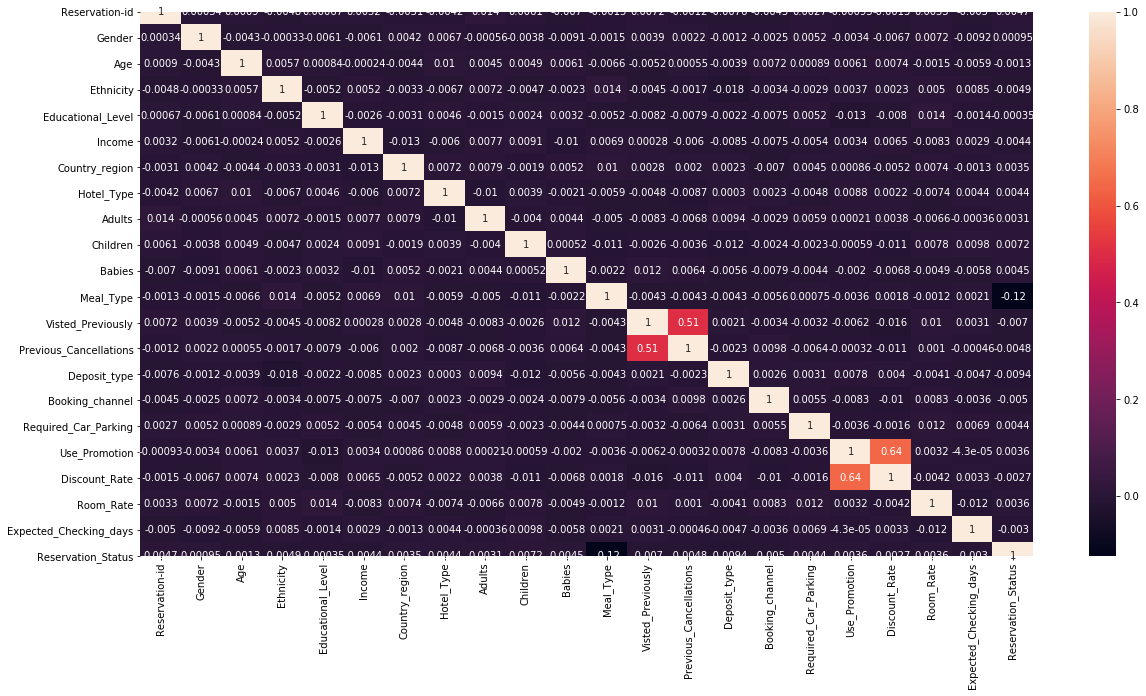

In [106]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix = train.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

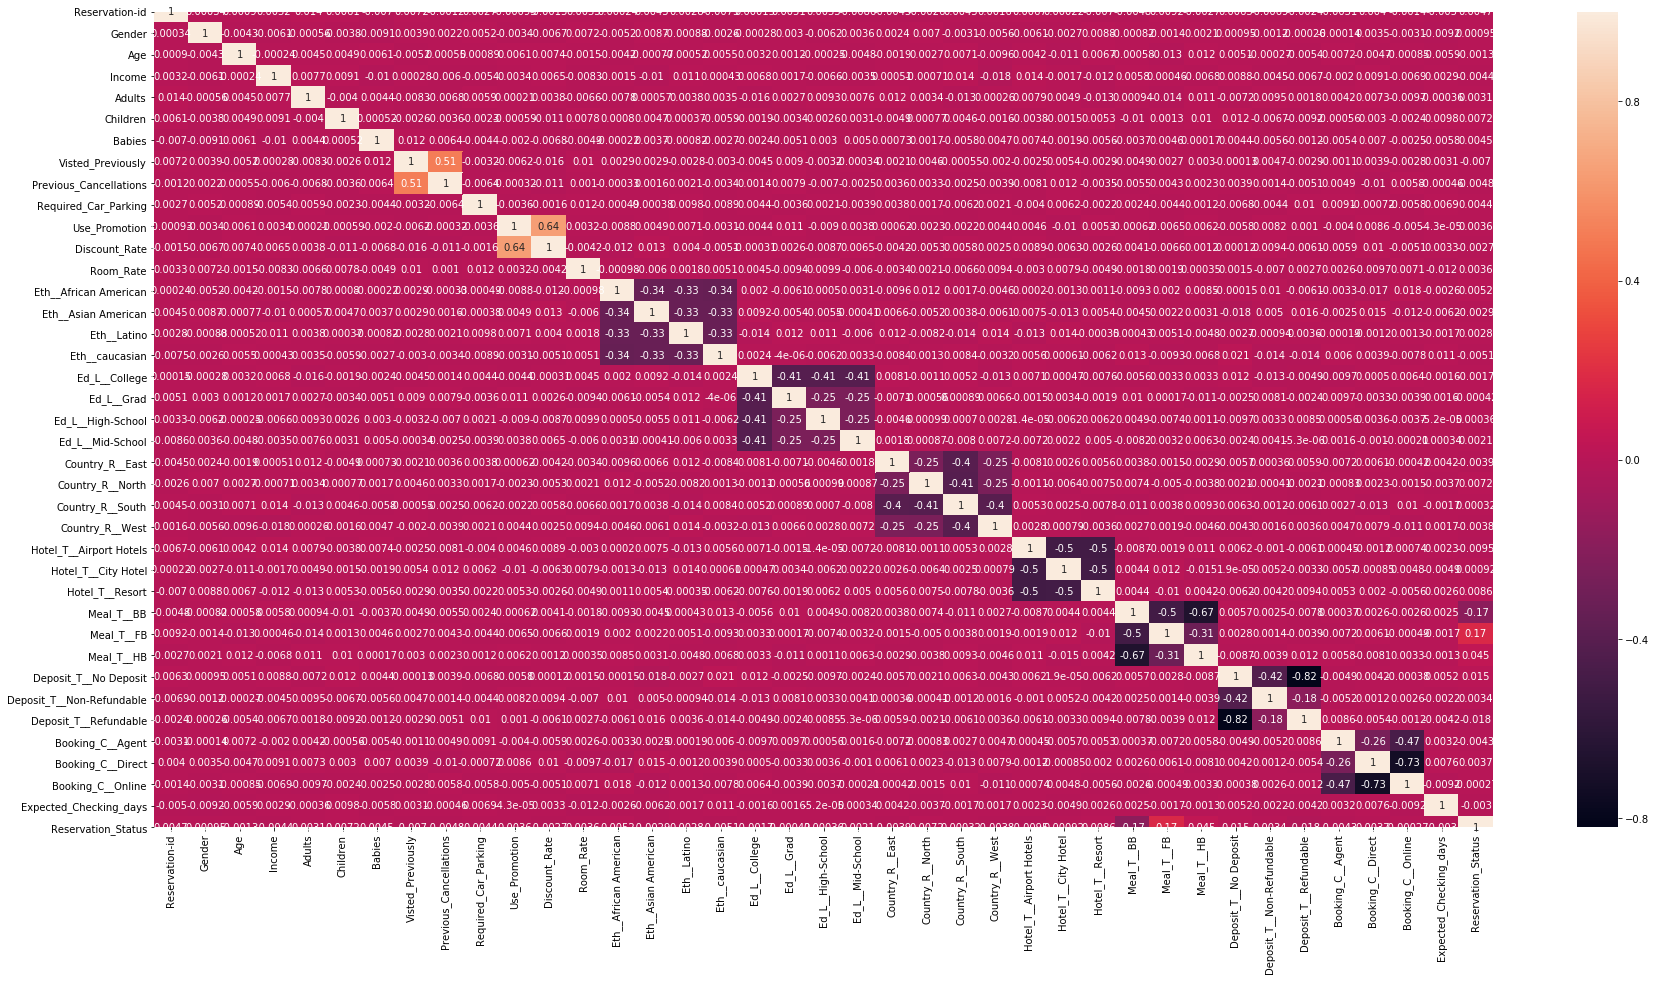

In [109]:
fig_dims = (30, 15)
fig, ax = plt.subplots(figsize=fig_dims)
corrMatrix1 = train2.corr()
sn.heatmap(corrMatrix1, annot=True)
plt.show()

In [107]:
# train2 correlations

corrMatrix1.Reservation_Status

Reservation-id               0.004722
Gender                       0.000950
Age                         -0.001303
Income                      -0.004443
Adults                       0.003079
Children                     0.007180
Babies                       0.004473
Visted_Previously           -0.007038
Previous_Cancellations      -0.004780
Required_Car_Parking         0.004444
Use_Promotion                0.003622
Discount_Rate               -0.002705
Room_Rate                    0.003621
Eth__African American        0.005178
Eth__Asian American         -0.002890
Eth__Latino                  0.002778
Eth__caucasian              -0.005080
Ed_L__College               -0.001663
Ed_L__Grad                  -0.000420
Ed_L__High-School            0.000365
Ed_L__Mid-School             0.002095
Country_R__East             -0.003865
Country_R__North             0.007173
Country_R__South             0.000317
Country_R__West             -0.003801
Hotel_T__Airport Hotels     -0.009484
Hotel_T__Cit

In [81]:
# train correlation

corrMatrix.Reservation_Status

Reservation-id            0.004722
Gender                    0.000950
Age                      -0.001303
Ethnicity                -0.004865
Educational_Level        -0.000350
Income                   -0.004443
Country_region            0.003526
Hotel_Type                0.004442
Adults                    0.003079
Children                  0.007180
Babies                    0.004473
Meal_Type                -0.122615
Visted_Previously        -0.007038
Previous_Cancellations   -0.004780
Deposit_type             -0.009406
Booking_channel          -0.004951
Required_Car_Parking      0.004444
Reservation_Status        1.000000
Use_Promotion             0.003622
Discount_Rate            -0.002705
Room_Rate                 0.003621
Name: Reservation_Status, dtype: float64

In [114]:
train.to_csv('Feature_only_Label_Encoded.csv',header=True,index=False)
train2.to_csv('Feature_Label_Encoded_OneHot_Encoded.csv',header=True,index=False)

In [266]:
train = pd.read_csv('Feature_only_Label_Encoded.csv')

In [23]:
validation

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,...,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Expected_Checking_days,Reservation_Status
0,45716350,0,2,4,1,1,3,3,2016-08-31,2016-09-02,...,0,0,1,3,0,1,15,192,2,3
1,88857401,0,2,3,3,2,3,3,2016-08-31,2016-09-04,...,1,0,1,2,1,0,0,187,4,2
2,16074440,1,2,2,3,1,4,2,2016-09-01,2016-09-02,...,0,0,1,1,0,1,10,227,1,2
3,10992124,1,0,3,3,2,2,2,2016-08-31,2016-09-02,...,1,0,2,1,0,1,25,189,2,1
4,15934351,1,2,2,3,2,1,1,2016-08-31,2016-09-01,...,1,0,1,2,1,1,10,218,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2744,32194836,1,0,4,3,3,1,3,2016-11-18,2016-11-21,...,1,0,2,2,0,1,10,199,3,1
2745,52215692,1,1,4,3,2,1,2,2016-12-09,2016-12-10,...,0,0,3,1,1,1,5,106,1,2
2746,31908733,0,0,2,1,2,4,3,2016-11-18,2016-11-20,...,0,0,2,3,0,1,20,136,2,3
2747,41776403,0,1,2,3,1,3,1,2016-11-18,2016-11-19,...,1,1,1,2,1,1,20,226,1,1


In [24]:
#test.to_csv('test_Label_Encoded.csv',header=True,index=False)
validation.to_csv('validation_Label_Encoded.csv',header=True,index=False)

In [149]:
#y = train2.Reservation_Status
#x = train2.copy()
x = x.drop(["Expected_checkin","Expected_checkout","Booking_date"],axis=1)

In [152]:
train2.isnull().sum().sort_values(ascending=False)

Reservation_Status           0
Visted_Previously            0
Eth__Latino                  0
Eth__Asian American          0
Eth__African American        0
Room_Rate                    0
Discount_Rate                0
Use_Promotion                0
Required_Car_Parking         0
Previous_Cancellations       0
Babies                       0
Expected_Checking_days       0
Children                     0
Adults                       0
Booking_date                 0
Expected_checkout            0
Expected_checkin             0
Income                       0
Age                          0
Gender                       0
Eth__caucasian               0
Ed_L__College                0
Ed_L__Grad                   0
Ed_L__High-School            0
Booking_C__Online            0
Booking_C__Direct            0
Booking_C__Agent             0
Deposit_T__Refundable        0
Deposit_T__Non-Refundable    0
Deposit_T__No Deposit        0
Meal_T__HB                   0
Meal_T__FB                   0
Meal_T__

In [157]:
train2.columns

Index(['Reservation-id', 'Gender', 'Age', 'Income', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Visted_Previously', 'Previous_Cancellations', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'Eth__African American',
       'Eth__Asian American', 'Eth__Latino', 'Eth__caucasian', 'Ed_L__College',
       'Ed_L__Grad', 'Ed_L__High-School', 'Ed_L__Mid-School',
       'Country_R__East', 'Country_R__North', 'Country_R__South',
       'Country_R__West', 'Hotel_T__Airport Hotels', 'Hotel_T__City Hotel',
       'Hotel_T__Resort', 'Meal_T__BB', 'Meal_T__FB', 'Meal_T__HB',
       'Deposit_T__No Deposit', 'Deposit_T__Non-Refundable',
       'Deposit_T__Refundable', 'Booking_C__Agent', 'Booking_C__Direct',
       'Booking_C__Online', 'Expected_Checking_days', 'Reservation_Status'],
      dtype='object')

In [151]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x, y)
print(model.feature_importances_)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.07412454 0.03252023 0.05427934 0.05398291 0.05436546 0.04595352
 0.03496195 0.02673843 0.01272331 0.0296323  0.02185032 0.05586795
 0.07206668 0.01692266 0.01654567 0.0186106  0.01914858 0.01526482
 0.01480962 0.01702824 0.01552628 0.01685875 0.01777258 0.02151894
 0.01774955 0.01396305 0.01684758 0.01391844 0.01743866 0.01428076
 0.00542122 0.01306212 0.01014725 0.01067181 0.01568788 0.02029038
 0.02202282 0.0494248 ]


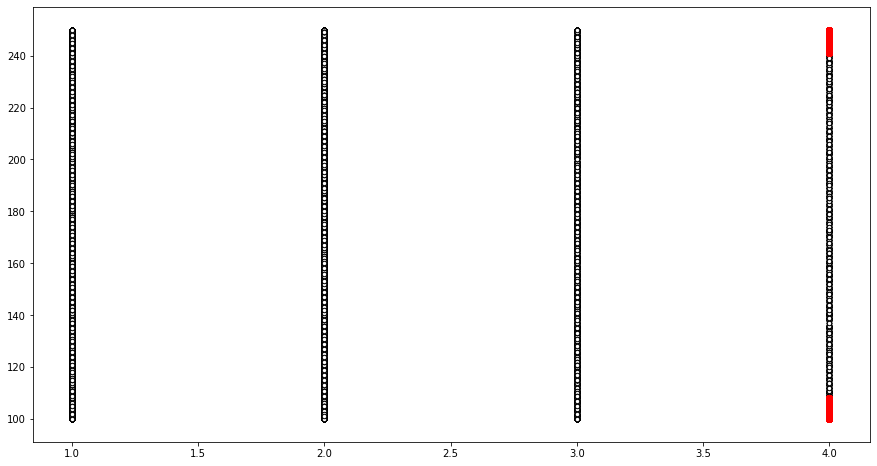

In [159]:
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt
import numpy as np
X = np.array(train2[['Expected_Checking_days','Room_Rate']])
ee = EllipticEnvelope(contamination=.01, random_state=0)
# predictions 
y_pred_ee = ee.fit_predict(X)
# predictions (-1: outlier, 1: normal)
anomalies = X[y_pred_ee == -1]
# plot data and outliers
plt.figure(figsize=(15, 8))
plt.scatter(X[:, 0], X[:, 1], c='white', s=20, edgecolor='k')
plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red');

In [160]:
train2[train2.Expected_Checking_days==4]

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,Reservation_Status
2,73747291,1,1,1,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,1
13,84744933,1,1,1,2015-07-05,2015-07-09,2015-06-21,1,2,0,1,0,1,1,25,180,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,4,1
21,42680944,1,3,4,2015-07-07,2015-07-11,2015-04-30,1,2,0,0,0,0,1,5,220,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,4,1
38,47244513,0,1,2,2015-05-23,2015-05-27,2015-04-14,4,2,1,1,0,0,0,0,166,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,4,1
39,5385714,0,0,3,2015-07-07,2015-07-11,2015-05-02,1,2,1,0,0,1,1,25,208,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27456,71671782,1,2,1,2016-08-30,2016-09-03,2016-02-18,2,3,0,0,0,1,1,10,244,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,4,1
27460,16912495,0,0,2,2016-08-30,2016-09-03,2016-02-05,3,1,0,0,0,1,1,5,243,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,4,1
27471,65705845,0,1,1,2016-08-30,2016-09-03,2016-02-23,2,2,0,0,0,1,0,0,142,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,4,2
27479,22019387,0,2,3,2016-08-31,2016-09-04,2016-02-28,1,2,0,0,0,1,1,20,181,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,4,1


In [271]:
X = train2.iloc[:, 1:41]
y = train2.iloc[:, 41].values

valX = validation.iloc[:, 1:41]
valy = validation.iloc[:, 41].values

In [332]:
test

,Reservation-id,Gender,Age,Income,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days
0,62931593,1,2,2,3,3,0,0,0,1,1,10,153,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1
1,70586099,1,2,2,2,1,0,0,0,0,0,0,210,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1
2,4230648,1,0,1,2,2,0,0,0,0,1,5,117,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,3
3,25192322,1,3,2,1,3,2,0,0,1,1,10,107,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,2
4,80931528,0,1,2,3,1,0,0,0,0,0,0,119,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4313,39110574,0,2,3,3,3,1,1,0,1,0,0,153,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1
4314,5496554,1,3,3,3,3,0,0,0,1,1,40,233,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,3
4315,59004046,1,2,1,2,3,0,0,0,1,0,0,242,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1
4316,65838682,0,1,2,4,2,1,0,0,1,0,0,208,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1


In [261]:
X = train.iloc[:, 1:41]
y = train.iloc[:, 41].values

valX = validation.iloc[:, 1:41]
valy = validation.iloc[:, 41].values

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [272]:
X = X.drop(["Expected_checkin","Expected_checkout","Booking_date",'Use_Promotion'],axis=1)
valX = valX.drop(["Expected_checkin","Expected_checkout","Booking_date",'Use_Promotion'],axis=1)

In [274]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
scaler.fit(X)
train=scaler.transform(X)

In [275]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)

In [310]:
train_pool = Pool(data=X, label=y)
test_pool = Pool(data=valX, label=valy) 

In [255]:
y = pd.DataFrame(y_test)

TypeError: Index(...) must be called with a collection of some kind, 'y' was passed

In [329]:
from catboost import Pool, CatBoostClassifier

model = CatBoostClassifier(iterations=625,
                           learning_rate=0.1,
                           depth=10,
                           loss_function='MultiClass',
                           class_weights=[0.33,0.85,0.97],
                           random_state=1)
                          

model.fit(train_pool)
preds_class = model.predict(test_pool)


print('#')

0:	learn: 1.0684250	total: 326ms	remaining: 3m 23s
1:	learn: 1.0430359	total: 586ms	remaining: 3m 2s
2:	learn: 1.0226137	total: 943ms	remaining: 3m 15s
3:	learn: 1.0050003	total: 1.31s	remaining: 3m 23s
4:	learn: 0.9894321	total: 1.76s	remaining: 3m 37s
5:	learn: 0.9766333	total: 1.96s	remaining: 3m 22s
6:	learn: 0.9649412	total: 2.2s	remaining: 3m 13s
7:	learn: 0.9546271	total: 2.37s	remaining: 3m 2s
8:	learn: 0.9458299	total: 2.58s	remaining: 2m 56s
9:	learn: 0.9379738	total: 2.74s	remaining: 2m 48s
10:	learn: 0.9300134	total: 2.93s	remaining: 2m 43s
11:	learn: 0.9232574	total: 3.09s	remaining: 2m 37s
12:	learn: 0.9159852	total: 3.29s	remaining: 2m 34s
13:	learn: 0.9090921	total: 3.42s	remaining: 2m 29s
14:	learn: 0.9024716	total: 3.58s	remaining: 2m 25s
15:	learn: 0.8963236	total: 3.73s	remaining: 2m 22s
16:	learn: 0.8904881	total: 3.89s	remaining: 2m 19s
17:	learn: 0.8852551	total: 4.04s	remaining: 2m 16s
18:	learn: 0.8796085	total: 4.22s	remaining: 2m 14s
19:	learn: 0.8746908	tota

160:	learn: 0.4923283	total: 20.1s	remaining: 58s
161:	learn: 0.4902085	total: 20.2s	remaining: 57.8s
162:	learn: 0.4879183	total: 20.3s	remaining: 57.7s
163:	learn: 0.4864794	total: 20.4s	remaining: 57.5s
164:	learn: 0.4848217	total: 20.6s	remaining: 57.3s
165:	learn: 0.4835347	total: 20.7s	remaining: 57.1s
166:	learn: 0.4818036	total: 20.8s	remaining: 57s
167:	learn: 0.4799941	total: 20.9s	remaining: 56.8s
168:	learn: 0.4789281	total: 21s	remaining: 56.6s
169:	learn: 0.4770519	total: 21.1s	remaining: 56.4s
170:	learn: 0.4751173	total: 21.2s	remaining: 56.2s
171:	learn: 0.4727128	total: 21.3s	remaining: 56.1s
172:	learn: 0.4707838	total: 21.4s	remaining: 55.8s
173:	learn: 0.4690548	total: 21.5s	remaining: 55.7s
174:	learn: 0.4668750	total: 21.6s	remaining: 55.5s
175:	learn: 0.4647261	total: 21.7s	remaining: 55.3s
176:	learn: 0.4626044	total: 21.8s	remaining: 55.1s
177:	learn: 0.4610242	total: 21.9s	remaining: 54.9s
178:	learn: 0.4591691	total: 22s	remaining: 54.8s
179:	learn: 0.457798

320:	learn: 0.2871289	total: 38.3s	remaining: 36.3s
321:	learn: 0.2862783	total: 38.5s	remaining: 36.2s
322:	learn: 0.2850258	total: 38.6s	remaining: 36.1s
323:	learn: 0.2844030	total: 38.7s	remaining: 35.9s
324:	learn: 0.2835715	total: 38.8s	remaining: 35.8s
325:	learn: 0.2825309	total: 38.9s	remaining: 35.7s
326:	learn: 0.2813713	total: 39.1s	remaining: 35.6s
327:	learn: 0.2804257	total: 39.2s	remaining: 35.5s
328:	learn: 0.2793087	total: 39.3s	remaining: 35.3s
329:	learn: 0.2783980	total: 39.4s	remaining: 35.2s
330:	learn: 0.2773780	total: 39.5s	remaining: 35.1s
331:	learn: 0.2767275	total: 39.6s	remaining: 34.9s
332:	learn: 0.2760416	total: 39.7s	remaining: 34.8s
333:	learn: 0.2754408	total: 39.8s	remaining: 34.7s
334:	learn: 0.2747232	total: 39.9s	remaining: 34.5s
335:	learn: 0.2735824	total: 40s	remaining: 34.4s
336:	learn: 0.2728506	total: 40.1s	remaining: 34.3s
337:	learn: 0.2720358	total: 40.2s	remaining: 34.2s
338:	learn: 0.2711237	total: 40.3s	remaining: 34s
339:	learn: 0.27

480:	learn: 0.1822921	total: 56.9s	remaining: 17s
481:	learn: 0.1819203	total: 57.1s	remaining: 16.9s
482:	learn: 0.1812744	total: 57.2s	remaining: 16.8s
483:	learn: 0.1807496	total: 57.3s	remaining: 16.7s
484:	learn: 0.1802333	total: 57.4s	remaining: 16.6s
485:	learn: 0.1796665	total: 57.5s	remaining: 16.5s
486:	learn: 0.1792350	total: 57.6s	remaining: 16.3s
487:	learn: 0.1787457	total: 57.8s	remaining: 16.2s
488:	learn: 0.1782430	total: 57.9s	remaining: 16.1s
489:	learn: 0.1776683	total: 58s	remaining: 16s
490:	learn: 0.1773394	total: 58.1s	remaining: 15.9s
491:	learn: 0.1769376	total: 58.2s	remaining: 15.7s
492:	learn: 0.1763793	total: 58.3s	remaining: 15.6s
493:	learn: 0.1758206	total: 58.4s	remaining: 15.5s
494:	learn: 0.1754830	total: 58.5s	remaining: 15.4s
495:	learn: 0.1750020	total: 58.6s	remaining: 15.2s
496:	learn: 0.1744242	total: 58.7s	remaining: 15.1s
497:	learn: 0.1739328	total: 58.8s	remaining: 15s
498:	learn: 0.1735739	total: 59s	remaining: 14.9s
499:	learn: 0.1731316	

In [333]:
pred_test = model.predict(test)


In [334]:
pred_test

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [330]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(valy,preds_class))
print(classification_report(valy,preds_class))

[[1519   76   15]
 [ 675   58    8]
 [ 360   32    6]]
              precision    recall  f1-score   support

           1       0.59      0.94      0.73      1610
           2       0.35      0.08      0.13       741
           3       0.21      0.02      0.03       398

    accuracy                           0.58      2749
   macro avg       0.38      0.35      0.30      2749
weighted avg       0.47      0.58      0.47      2749



In [331]:
from sklearn.metrics import f1_score

f1_score(valy, preds_class, average='macro')

0.29519471223179466

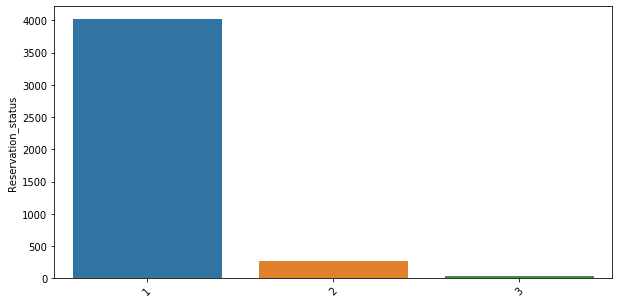

In [337]:
cat_num = results['Reservation_status'].value_counts()
f, ax = plt.subplots(figsize=(10,5))
plot = sn.barplot(x=cat_num.index, y=cat_num)
plot.set_xticklabels(plot.get_xticklabels(), rotation=45)
plt.show()

In [338]:
cat_num

1    4015
2     267
3      36
Name: Reservation_status, dtype: int64

In [212]:
len(preds_class)

5500

In [184]:
train2

,Reservation-id,Gender,Age,Income,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Visted_Previously,Previous_Cancellations,Required_Car_Parking,Use_Promotion,Discount_Rate,Room_Rate,Eth__African American,Eth__Asian American,Eth__Latino,Eth__caucasian,Ed_L__College,Ed_L__Grad,Ed_L__High-School,Ed_L__Mid-School,Country_R__East,Country_R__North,Country_R__South,Country_R__West,Hotel_T__Airport Hotels,Hotel_T__City Hotel,Hotel_T__Resort,Meal_T__BB,Meal_T__FB,Meal_T__HB,Deposit_T__No Deposit,Deposit_T__Non-Refundable,Deposit_T__Refundable,Booking_C__Agent,Booking_C__Direct,Booking_C__Online,Expected_Checking_days,Reservation_Status
0,39428300,1,1,1,2015-07-01,2015-07-02,2015-05-21,2,2,0,0,0,1,1,10,218,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,1
1,77491756,1,2,3,2015-07-01,2015-07-02,2015-05-26,3,3,0,0,0,1,0,0,185,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,1,1
2,73747291,1,1,1,2015-07-02,2015-07-06,2015-06-29,3,3,0,0,0,1,0,0,119,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,4,1
3,67301739,0,0,4,2015-07-02,2015-07-03,2015-06-20,4,3,0,0,0,1,1,5,144,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,1
4,77222321,1,3,2,2015-07-03,2015-07-04,2015-06-20,1,1,0,0,0,0,1,10,242,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27494,15645505,1,2,1,2016-08-31,2016-09-01,2016-07-25,1,2,1,1,1,1,1,10,100,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,1
27495,56414525,1,2,2,2016-08-31,2016-09-01,2016-04-26,2,1,0,0,0,1,1,40,194,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,3
27496,52023375,1,2,3,2016-09-01,2016-09-02,2016-08-23,2,1,1,0,0,1,1,5,202,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1
27497,98041387,0,3,2,2016-08-31,2016-09-01,2016-05-25,3,2,0,0,0,0,1,20,157,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,1,2


In [278]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(iterations=300,learning_rate=0.1,depth=3,loss_function='MultiClass')
cat.fit(train_pool)
y_pred = cat.predict(test_pool)
print(y_pred.shape)
#y_pred=y_pred>0.5

0:	learn: 1.0128783	total: 46.4ms	remaining: 13.9s
1:	learn: 0.9493902	total: 92.9ms	remaining: 13.8s
2:	learn: 0.8996692	total: 132ms	remaining: 13s
3:	learn: 0.8581417	total: 169ms	remaining: 12.5s
4:	learn: 0.8246195	total: 207ms	remaining: 12.2s
5:	learn: 0.7966942	total: 232ms	remaining: 11.4s
6:	learn: 0.7740595	total: 274ms	remaining: 11.5s
7:	learn: 0.7553993	total: 308ms	remaining: 11.2s
8:	learn: 0.7397743	total: 352ms	remaining: 11.4s
9:	learn: 0.7268076	total: 394ms	remaining: 11.4s
10:	learn: 0.7158834	total: 422ms	remaining: 11.1s
11:	learn: 0.7074415	total: 450ms	remaining: 10.8s
12:	learn: 0.6997251	total: 491ms	remaining: 10.8s
13:	learn: 0.6938858	total: 541ms	remaining: 11s
14:	learn: 0.6882980	total: 573ms	remaining: 10.9s
15:	learn: 0.6836917	total: 598ms	remaining: 10.6s
16:	learn: 0.6803147	total: 624ms	remaining: 10.4s
17:	learn: 0.6770248	total: 653ms	remaining: 10.2s
18:	learn: 0.6740985	total: 678ms	remaining: 10s
19:	learn: 0.6716475	total: 703ms	remaining: 

172:	learn: 0.6507837	total: 4.25s	remaining: 3.12s
173:	learn: 0.6507152	total: 4.27s	remaining: 3.09s
174:	learn: 0.6506613	total: 4.28s	remaining: 3.06s
175:	learn: 0.6505859	total: 4.29s	remaining: 3.02s
176:	learn: 0.6505294	total: 4.3s	remaining: 2.99s
177:	learn: 0.6504729	total: 4.32s	remaining: 2.96s
178:	learn: 0.6504003	total: 4.33s	remaining: 2.93s
179:	learn: 0.6503219	total: 4.34s	remaining: 2.9s
180:	learn: 0.6502891	total: 4.36s	remaining: 2.86s
181:	learn: 0.6502583	total: 4.37s	remaining: 2.83s
182:	learn: 0.6502040	total: 4.38s	remaining: 2.8s
183:	learn: 0.6501647	total: 4.4s	remaining: 2.77s
184:	learn: 0.6501119	total: 4.41s	remaining: 2.74s
185:	learn: 0.6500743	total: 4.43s	remaining: 2.72s
186:	learn: 0.6500211	total: 4.45s	remaining: 2.69s
187:	learn: 0.6499690	total: 4.46s	remaining: 2.65s
188:	learn: 0.6499083	total: 4.47s	remaining: 2.63s
189:	learn: 0.6498261	total: 4.5s	remaining: 2.6s
190:	learn: 0.6497813	total: 4.51s	remaining: 2.57s
191:	learn: 0.6497

In [279]:
#pr = cat.predict(test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(valy,y_pred))
print(classification_report(valy,y_pred))

[[1610    0    0]
 [ 741    0    0]
 [ 398    0    0]]
              precision    recall  f1-score   support

           1       0.59      1.00      0.74      1610
           2       0.00      0.00      0.00       741
           3       0.00      0.00      0.00       398

    accuracy                           0.59      2749
   macro avg       0.20      0.33      0.25      2749
weighted avg       0.34      0.59      0.43      2749



C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [280]:
f1_score(valy, y_pred, average='macro')

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


0.2462338456832607

In [173]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(valy,y_pred)
print(cm)

[[1610    0    0]
 [ 741    0    0]
 [ 398    0    0]]


In [339]:
results = pd.DataFrame()
results['Reservation-id']=test['Reservation-id']
results['Reservation_status']=pred_test
results.to_csv('Results2.csv',header=True,index=False)

In [336]:
results

,Reservation-id,Reservation_status
0,62931593,1
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,1
4314,5496554,1
4315,59004046,1
4316,65838682,1
